# We are going to predict the financial loss category (by 6 categories) of a cybersecurity attack, using different models. Our goal is to compare these different models, and see which one is the best in our case.

In [58]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
    VotingRegressor,
    StackingRegressor
)
from sklearn.neural_network import MLPRegressor

In [62]:
# csv opening
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

df.head(50)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2018.884712,Phishing,Education,388.0,382.0,Hacker Group,Unpatched Software,VPN,458.0
1,China,2018.939848,Ransomware,Retail,270.0,309.0,Hacker Group,Unpatched Software,Firewall,344.0
2,India,2016.727395,Man-in-the-Middle,IT,215.0,257.0,Hacker Group,Weak Passwords,VPN,359.0
3,UK,2024.098701,Ransomware,Telecommunications,372.0,381.0,Nation-state,Social Engineering,Unknown,306.0
4,Germany,2018.082098,Man-in-the-Middle,IT,280.0,273.0,Insider,Social Engineering,VPN,438.0
5,Germany,2017.119826,Man-in-the-Middle,Retail,168.0,231.0,Unknown,Social Engineering,Antivirus,296.0
6,Germany,2019.844741,DDoS,Telecommunications,NaN,318.0,Insider,Unpatched Software,VPN,NaN
7,France,2018.195609,SQL Injection,Government,349.0,335.0,Unknown,Social Engineering,Antivirus,481.0
8,India,2016.142415,Man-in-the-Middle,Banking,231.0,247.0,Unknown,Social Engineering,VPN,410.0
9,UK,2023.226235,DDoS,Healthcare,427.0,405.0,Hacker Group,Unpatched Software,Firewall,432.0


General informations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3079 non-null   object 
 1   Year                                 2990 non-null   float64
 2   Attack Type                          3070 non-null   object 
 3   Target Industry                      3076 non-null   object 
 4   Financial Loss (in Million $)        2990 non-null   float64
 5   Number of Affected Users             2990 non-null   float64
 6   Attack Source                        3076 non-null   object 
 7   Security Vulnerability Type          3071 non-null   object 
 8   Defense Mechanism Used               3078 non-null   object 
 9   Incident Resolution Time (in Hours)  2990 non-null   float64
dtypes: float64(4), object(6)
memory usage: 241.5+ KB
None 

Descriptive statist

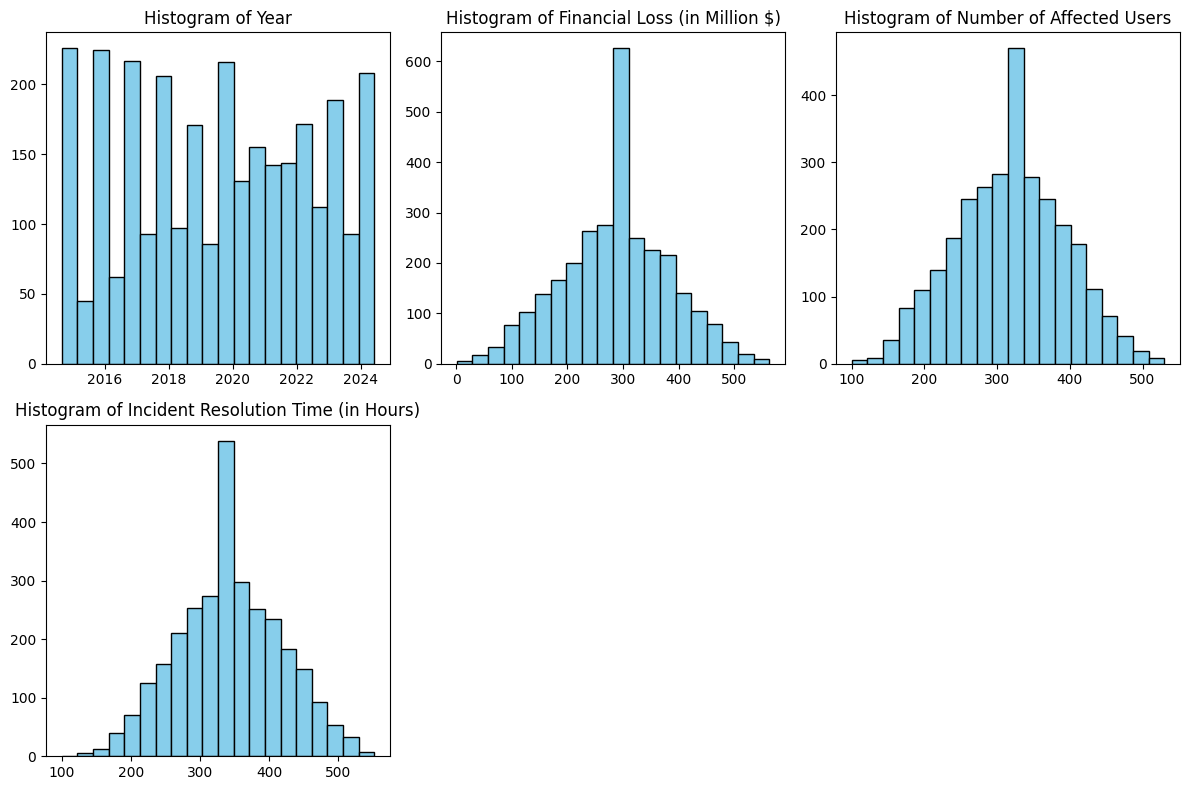

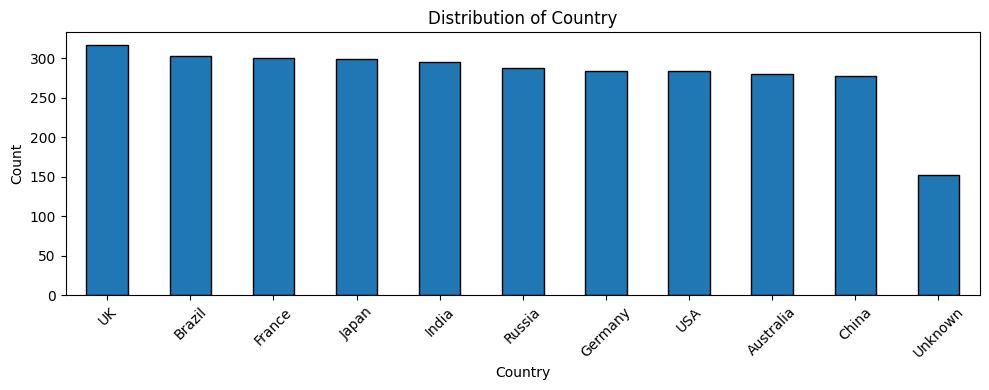

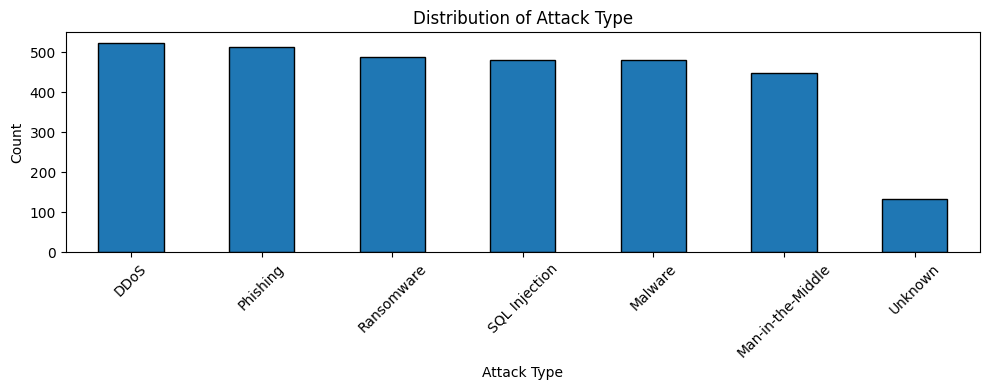

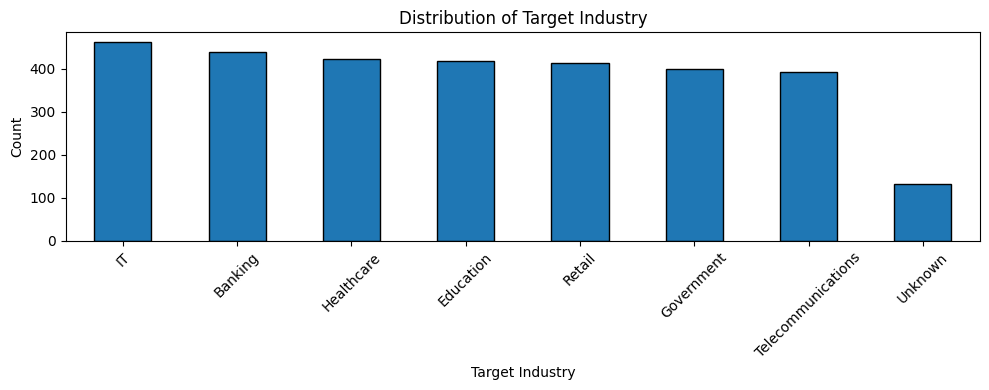

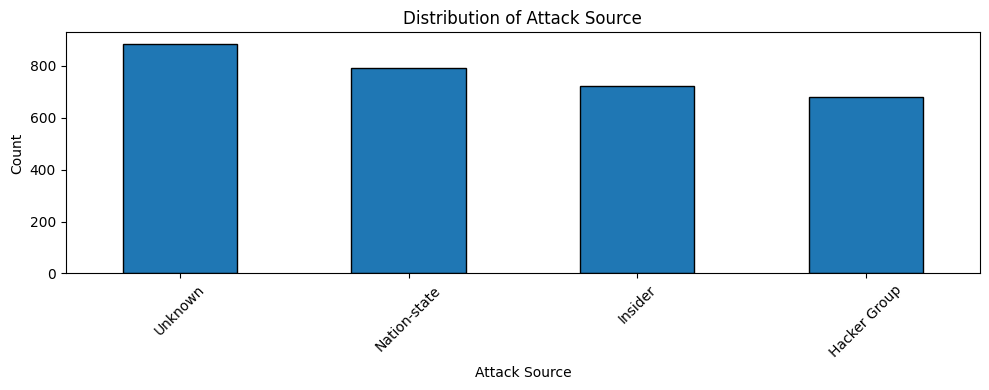

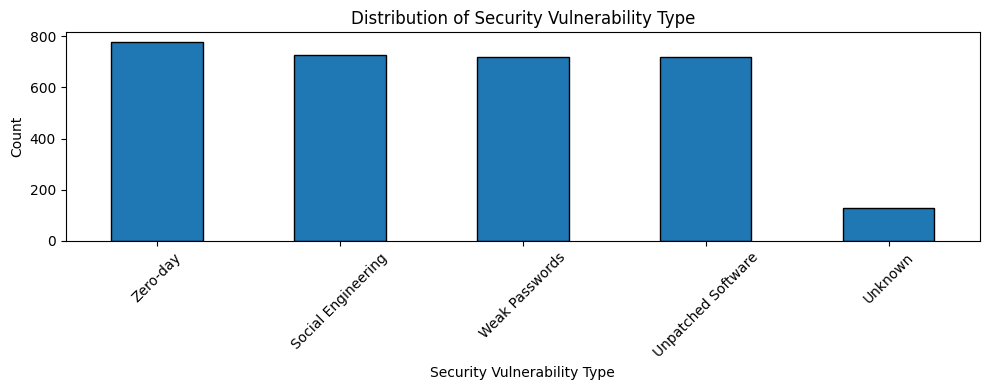

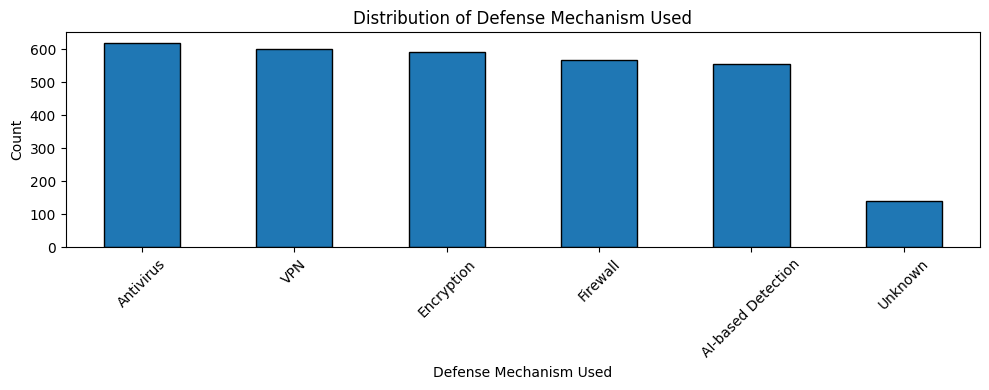

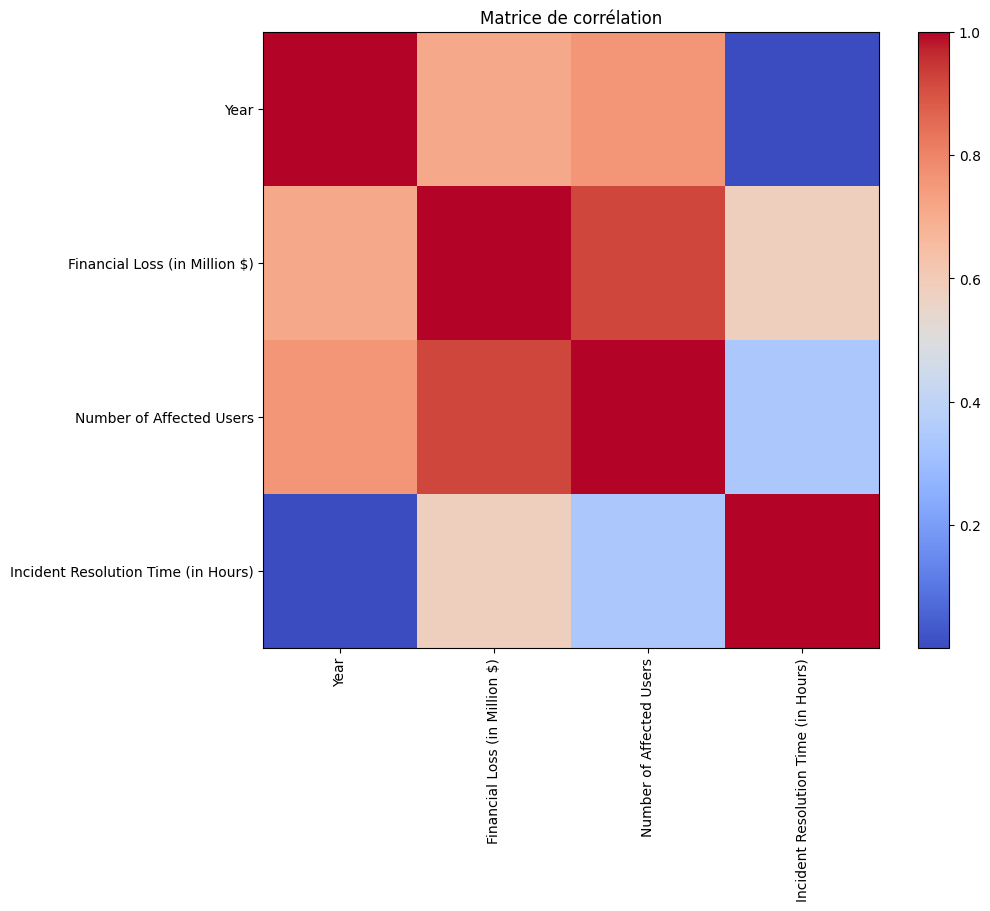

In [64]:
print("General informations")
print(df.info(), "\n")

print("Descriptive statistics")
print(df.describe(include='all'), "\n")

print("NaN count")
print(df.isna().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.tight_layout()

plt.show()

# General distribution statistics
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Corelation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matrice de corrélation")
plt.show()


In [52]:
# Cleaning
target = "Financial Loss (in Million $)"

num_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# NaN cleaning
# Fill median for NaN values of numerical columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
# Fill unknown for NaN values of qualitive columns
df[cat_cols] = dffMLP[cat_cols].fillna("Unknown")

# Outliers cleaning
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df[target] >= lower) & (df[target] <= upper)]

# Preparation of X & y
X = df.drop(columns=[target])
y = df[target]

# Pipeline
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

# ColumnTransformer: numeric are scalind, categorical are one-hoted
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [54]:
# Double check
print("NaN count")
print(df.isna().sum())

# Select numeric columns
num_cols = df.select_dtypes(include=['number']).columns

print("Outlier count per column:")

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"{col}: {len(outliers)} outliers")


NaN count
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64
Outlier count per column:
Year: 0 outliers
Financial Loss (in Million $): 10 outliers
Number of Affected Users: 3 outliers
Incident Resolution Time (in Hours): 13 outliers


In [56]:
# Linear Regression (baseline)

reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),     # scaling + one-hot encoding
    ("regressor", LinearRegression())   # baseline regression model
])

# Train model
reg_model.fit(X_train, y_train)

# Predictions
pred = reg_model.predict(X_test)

print("Linear Regression")

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Linear Regression
MAE : 11.961797056946274
RMSE: 22.488071690660743
R²  : 0.9385019784804076


MAE = 11.96 means that on average, the model’s predictions are off by about 12 units of financial loss.
RMSE = 22.49 means that model is consistent, without huge spikes in error.
R² = 0.9385 means our model explains 93.85% of the variance in financial loss.

So results here are already pretty good.
Our goal is to maximise R² and minimine MAE and RMSE. So let's try some other models

In [9]:
# SVR (baseline)

svr_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),   # scaling + one-hot encoding
    ("regressor", SVR(kernel="rbf"))  # baseline svr regressor
])

# Train model
svr_reg_model.fit(X_train, y_train)

# Predictions
pred = svr_reg_model.predict(X_test)

print("SVR")

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


SVR
MAE : 25.428661125623375
RMSE: 37.935137978425495
R²  : 0.8249991951926101


Here we can see that performances are a bit lower than linear regression

In [10]:
# Decision Tree Regressor (baseline)

dt_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(
        criterion="squared_error",   
        max_depth=6,
        random_state=42
    ))
])

# Train model
dt_reg_model.fit(X_train, y_train)

# Predictions
pred = dt_reg_model.predict(X_test)

print("Decision Tree Regressor")

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Decision Tree Regressor
MAE : 16.981064507824783
RMSE: 23.330017322851678
R²  : 0.9338108456550351


Result are still very competitive.

Now that we have explored the baseline model, let's see the results on some more advanced model such as RandomForest

In [11]:
# RandomForest Regressor (advanced model)

rf_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
rf_reg_model.fit(X_train, y_train)

# Predictions
pred = rf_reg_model.predict(X_test)

print("Random Forest Regressor")

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Random Forest Regressor
MAE : 7.632124183006537
RMSE: 11.593408741725762
R²  : 0.983655222780818


Results are almost perfect.

We can now analyse other more advanced models like GrandientBoosting or MLP Neural Network

In [12]:
# Gradient Boosting Regressor (advanced model)

gb_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3
    ))
])

# Train model
gb_reg_model.fit(X_train, y_train)

# Predictions
pred = gb_reg_model.predict(X_test)

print("Gradient Boosting Regressor")

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Gradient Boosting Regressor
MAE : 7.965967921365602
RMSE: 11.919409027626925
R²  : 0.9827230865927091


Same conclusion as Random Forest regressor.

In [13]:
# MLP Neural Network Regressor

mlp_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", MLPRegressor(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        max_iter=2000,
        learning_rate_init=0.001,
        random_state=42
    ))
])

# Train model
mlp_reg_model.fit(X_train, y_train)

# Predictions
pred = mlp_reg_model.predict(X_test)

print("MLP Neural Network Regressor")

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


MLP Neural Network Regressor
MAE : 19.416362249367367
RMSE: 28.630059712615612
R²  : 0.9003215634397991


Results are a bit less good.

Now that we saw bunch of different models, we can classify them by their performances.
1) Random Forest Regressor
2) Gradient Boosting Regressor 
3) Linear Regression
4) Decision Tree
5) MLP Neural Network Regressor
6) SVR

However, some model can be "hyperparametered".
We'll do some model hyperparameter’s tuning, specially on the baseline ones (Logistic Regression, svr and Decision Tree)

First we'll need to use Grid Search
Grid Search finds the best hyperparameters for Linear Regression (we are using Ridge which is a equivalent of Linear Regression).

In [14]:
# Pipeline with preprocessing and Ridge Regression
best_linreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge())
])

# Search space 
param_grid = {
    "regressor__alpha": [0.01, 0.1, 1, 10, 100],
    "regressor__solver": ["auto", "lsqr", "sparse_cg", "sag"]
}

grid_search = GridSearchCV(
    best_linreg_model,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Grid Search best result (Ridge Regression)")
print("Best R²:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)


Grid Search best result (Ridge Regression)
Best R²: 0.9406185878965541
Best Params: {'regressor__alpha': 10, 'regressor__solver': 'lsqr'}


Now that we have the best parameters, let's apply them

In [15]:
# Applying parameters on Ridge Regression
best_linreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", Ridge(
        alpha=10,
        solver="lsqr",
    ))
])

best_linreg_model.fit(X_train, y_train)
pred_best = best_linreg_model.predict(X_test)

print("Linear regressor (tuned with Ridge)")

mae = mean_absolute_error(y_test, pred_best)
mse = mean_squared_error(y_test, pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_best)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Linear regressor (tuned with Ridge)
MAE : 12.035227626550409
RMSE: 22.492055236960145
R²  : 0.9384801889808575


We see that chosing new hyperparameters slightly enhanced the reliability of our model.

In [16]:
# Pipeline with preprocessing and SVR
svr_reg_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", SVR())
])

# Search space
svr_reg_param_grid = {
    "regressor__C": [0.1, 1, 10, 50],
    "regressor__gamma": ["scale", 0.1, 0.01],
    "regressor__kernel": ["rbf"] 
}

svr_reg_grid_search = GridSearchCV(
    svr_reg_pipe,
    svr_reg_param_grid,
    cv=5,
    scoring="r2",      
    n_jobs=-1
)

svr_reg_grid_search.fit(X_train, y_train)

print("Grid Search best results (SVR)")
print("Best R²:", svr_reg_grid_search.best_score_)
print("Best Params:", svr_reg_grid_search.best_params_)


Grid Search best results (SVR)
Best R²: 0.9399849899230237
Best Params: {'regressor__C': 50, 'regressor__gamma': 0.1, 'regressor__kernel': 'rbf'}


In [17]:
# Applying parameters on SVR
best_svr_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", SVR(
        C=50,
        gamma=0.1,
        kernel="rbf"
    ))
])

best_svr_reg_model.fit(X_train, y_train)
pred_best_svr = best_svr_reg_model.predict(X_test)

print("SVR (Tuned)")

mae = mean_absolute_error(y_test, pred_best_svr)
mse = mean_squared_error(y_test, pred_best_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_best_svr)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


SVR (Tuned)
MAE : 11.512682916677623
RMSE: 23.3078961315362
R²  : 0.9339363053807849


Results are way better than the old SVR.

In [18]:
# Pipeline: preprocessing + Decision Tree Regressor
dt_reg_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

# Search space
dt_reg_param_grid = {
    "regressor__criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "regressor__max_depth": [3, 5, 7, 10, None],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

dt_reg_grid_search = GridSearchCV(
    dt_reg_pipe,
    dt_reg_param_grid,
    cv=5,
    scoring="r2",   
    n_jobs=-1
)

dt_reg_grid_search.fit(X_train, y_train)

print("Grid Search best results (Decision Tree Regressor)")
print("Best R²:", dt_reg_grid_search.best_score_)
print("Best Params:", dt_reg_grid_search.best_params_)


Grid Search best results (Decision Tree Regressor)
Best R²: 0.9678116864977954
Best Params: {'regressor__criterion': 'squared_error', 'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}


In [19]:
# Applying parameters on Decision Tree Regressor
best_dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(
        criterion="friedman_mse",  
        max_depth=10,                 
        min_samples_split=5,         
        min_samples_leaf=2,         
    ))
])

best_dt_model.fit(X_train, y_train)
pred_best_dt = best_dt_model.predict(X_test)

print("Decision Tree Regressor (tuned)")

mae = mean_absolute_error(y_test, pred_best_dt)
mse = mean_squared_error(y_test, pred_best_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_best_dt)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Decision Tree Regressor (tuned)
MAE : 11.39164333099796
RMSE: 17.873876228539782
R²  : 0.9611497155972651


We now can establish a new ranking:
1) Random Forest Regressor
2) Gradient Boosting Regressor
3) SVR (Tuned)
4) Linear Regression Tuned)
5) Decision Tree (Tuned)
6) Linear Regression
7) Decision Tree
8) MLP Neural Network Regressor
9) SVR

We can now check out some other type of models : Ensemble models.
We'll analyse 3 different ensemble model: voting ,bagging and stacking ensemble

In [20]:
# Voting Regressor
voting_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", VotingRegressor(
        estimators=[
            ("lr", LinearRegression()),
            ("svr", SVR(kernel="rbf")),
            ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
        ]
    ))
])

voting_reg_model.fit(X_train, y_train)
pred_voting = voting_reg_model.predict(X_test)

print("Voting Regressor")

mae = mean_absolute_error(y_test, pred_voting)
mse = mean_squared_error(y_test, pred_voting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_voting)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Voting Regressor
MAE : 13.947160320741995
RMSE: 20.61639430618199
R²  : 0.9483129038445789


In [21]:
# Bagging Regressor
bagging_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=6),
        n_estimators=50,
        random_state=42,
        n_jobs=-1
    ))
])

bagging_model.fit(X_train, y_train)
pred_bagging = bagging_model.predict(X_test)

print("Bagging Regressor")

mae = mean_absolute_error(y_test, pred_bagging)
mse = mean_squared_error(y_test, pred_bagging)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_bagging)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Bagging Regressor
MAE : 12.126053803265812
RMSE: 16.214794009597046
R²  : 0.9680272802067501


In [23]:
# Stacking Regressor
stacking_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", StackingRegressor(
        estimators=[
            ("lr", LinearRegression()),
            ("svr", SVR(kernel="rbf")),
            ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
        ],
        final_estimator=GradientBoostingRegressor(),
        n_jobs=-1
    ))
])

stacking_model.fit(X_train, y_train)
pred_stacking = stacking_model.predict(X_test)

print("Stacking Regressor")

mae = mean_absolute_error(y_test, pred_stacking)
mse = mean_squared_error(y_test, pred_stacking)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_stacking)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


Stacking Regressor
MAE : 6.998714445808349
RMSE: 10.94271269774277
R²  : 0.9854384802450168


Results seem to be the beest on Stackin Regressor model.

Let's try to compare prediction and true values

In [24]:
def plot_prediction_comparison(y_true, y_pred, title):
    plt.figure(figsize=(10, 5))

    plt.hist(y_true, bins=20, alpha=0.6, label="True Values", color="skyblue", edgecolor="black")
    plt.hist(y_pred, bins=20, alpha=0.6, label="Predicted Values", color="orange", edgecolor="black")

    plt.xlabel("Financial Loss")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


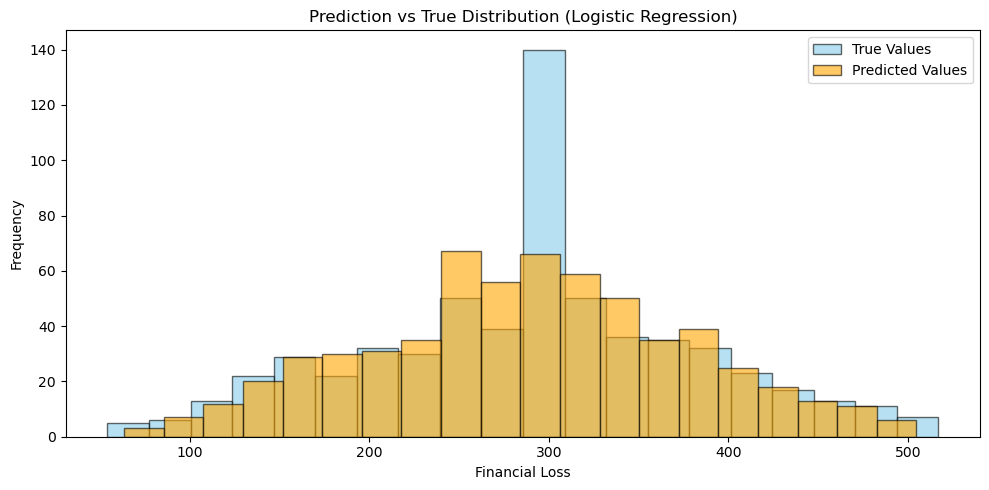

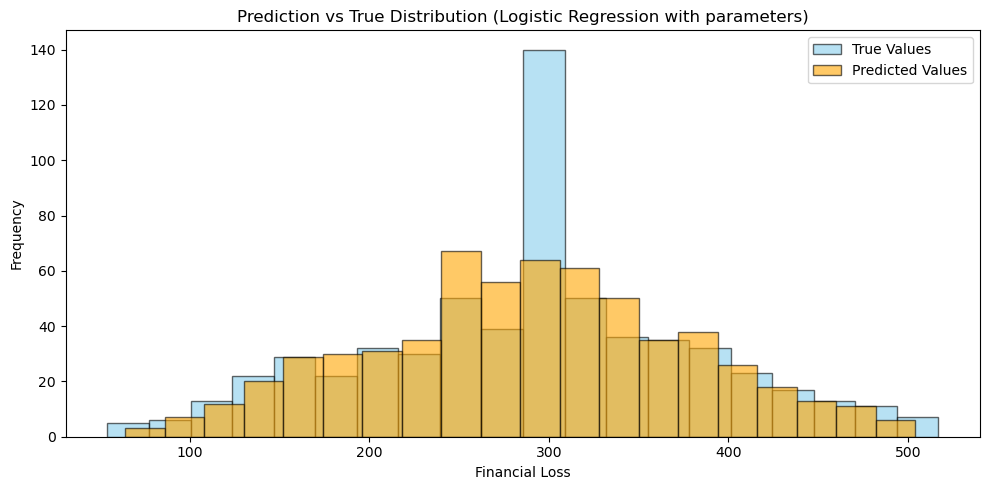

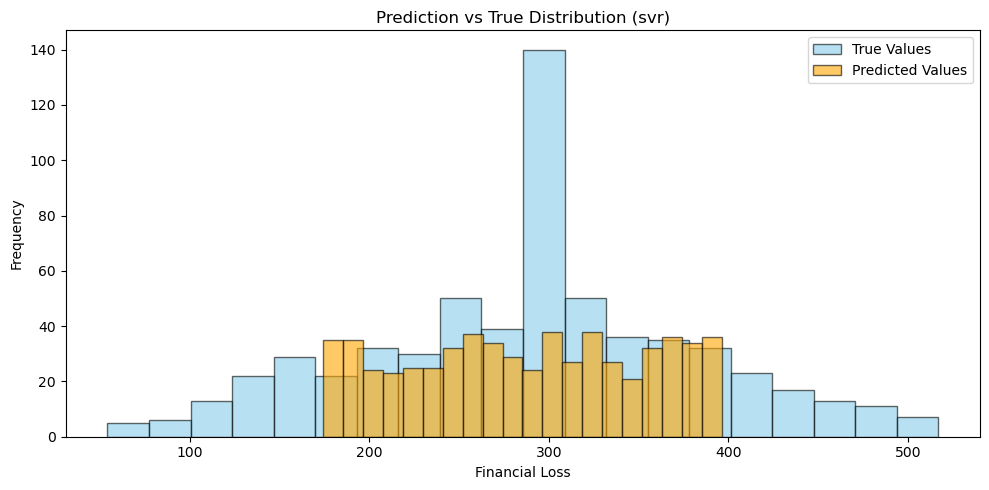

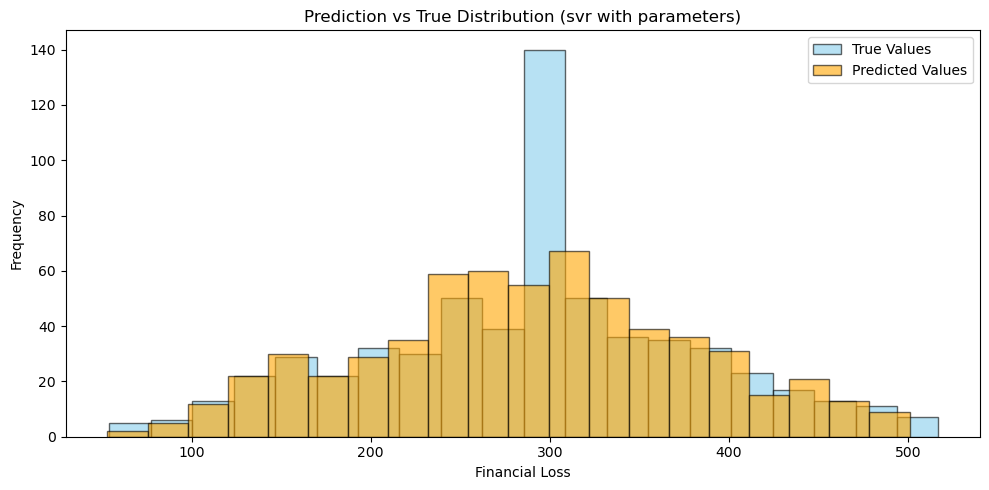

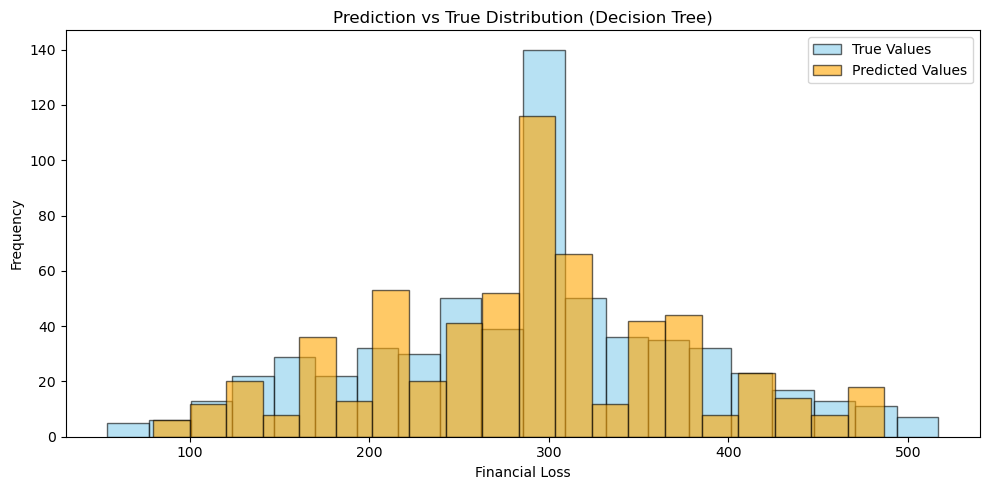

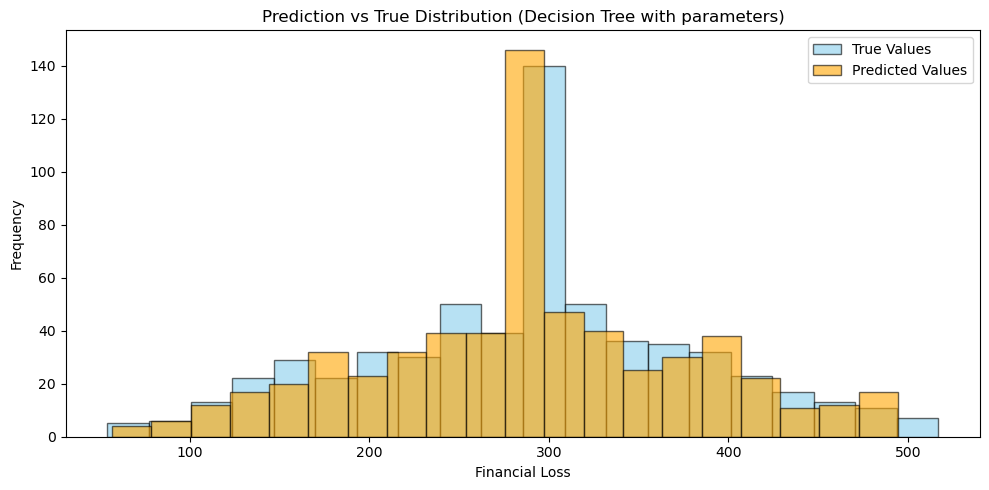

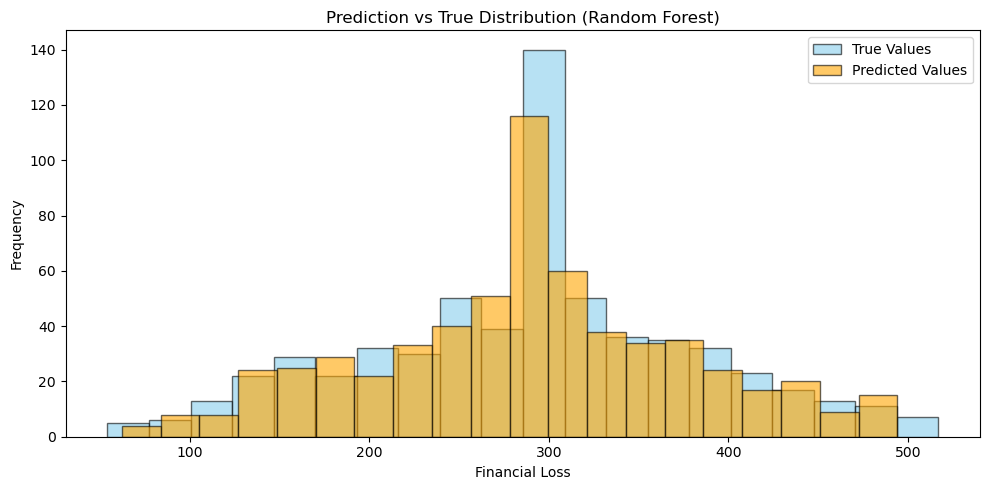

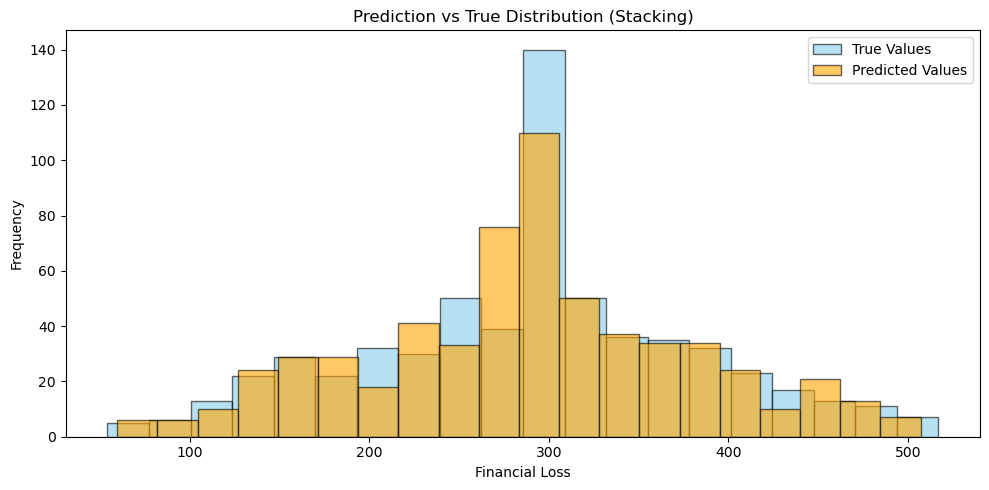

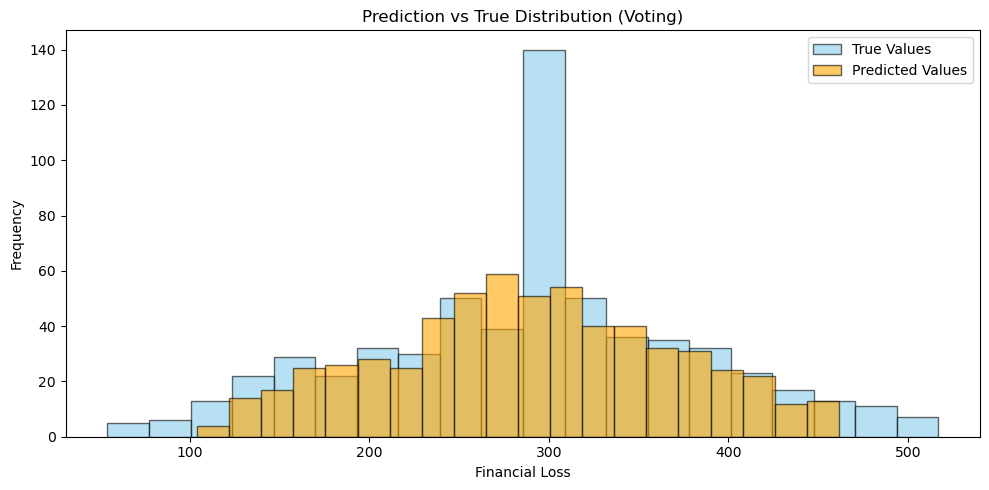

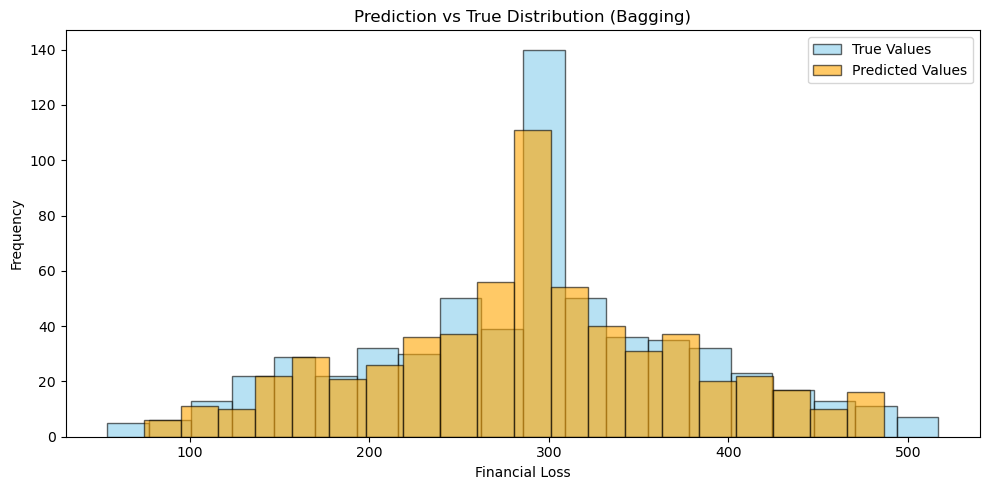

In [25]:
pred = reg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Logistic Regression)")

pred = best_linreg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Logistic Regression with parameters)")

pred = svr_reg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (svr)")

pred = best_svr_reg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (svr with parameters)")

pred = dt_reg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Decision Tree)")

pred = best_dt_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Decision Tree with parameters)")

pred = rf_reg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Random Forest)")

pred = stacking_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Stacking)")

pred = voting_reg_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Voting)")

pred = bagging_model.predict(X_test)
plot_prediction_comparison(y_test, pred, "Prediction vs True Distribution (Bagging)")

After testing a wide range of classification models including Logistic Regression, svr, Decision Trees, Random Forests, Gradient Boosting, and several ensemble techniques, we observed that none of them exceeded an accuracy of about 40%. Even with hyperparameter tuning, dimensionality reduction, and extensive preprocessing, the models struggled to learn meaningful patterns. Our correlation analysis revealed that the dataset contains very weak relationships between the input variables and the financial loss category, meaning the features simply do not provide enough predictive information. As a result, the limited accuracy is not due to model choice but to the lack of correlated or informative variables in the dataset, making the prediction task inherently difficult.

With all of that, we can still try to predict the financial impact of an arriving attack.
Here's a fictional exemple:
- Country : USA
- Year : 2030
- Attack Type : Ransomware
- Target Industry : Banking
- Number of Affected Users (k): 500
- Attack Source : External
- Security Vulnerability Type : Zero-Day
- Defense Mechanism Used : Firewall
- Inciden Resolution Time : 120h

We will predict financial loss category.

In [29]:
# New attack scenario
new_attack = pd.DataFrame([{
    "Country": "USA",
    "Year": 2030,
    "Attack Type": "Ransomware",
    "Target Industry": "Banking",
    "Number of Affected Users": 500,
    "Attack Source": "External",
    "Security Vulnerability Type": "Zero-Day",
    "Defense Mechanism Used": "Firewall",
    "Incident Resolution Time (in Hours)": 120
}])


In [35]:
# Apply the best model
prediction = stacking_model.predict(new_attack)[0]
print("Predicted Loss Category:", prediction)

Predicted Loss Category: 417.65379647920753


In [136]:
# for MLLP https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0311041
# for Gradient Boost: https://arxiv.org/pdf/2410.05623